# CIFAR-10 DATA VISUALISATION

In this part we will take a look at the data we are using. We focus on the following questions:
- How our data look like?
- What distribution does this data undergo?
- Analytics of the tabular representation of our data.
- Normalization and Standartization processes
- Sketching analytical graphs.

## Analytics of the normalized and augmented data

First we load all the necessary modules, such as:
- pandas - for tabular data representation
- numpy - multy dim. array calculations
- torch - multy dim. tesnor calculations

In [1]:
import torch
import torchvision
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from data_cifar_10 import train_loader, validation_loader, test_loader

Files already downloaded and verified
Files already downloaded and verified


Loading 1000 samples from DataLoaders (after data augmentation, and standartizaion were performed)

In [2]:
small_batch_images = []
small_batch_labels = []

count = 0
for images, labels in train_loader:
    small_batch_images.append(images)
    small_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_sample = torch.cat(small_batch_images)[:1000]
y_sample = torch.cat(small_batch_labels)[:1000]

red_pixels   = X_sample[:, 0, :, :]
green_pixels = X_sample[:, 1, :, :]
blue_pixels  = X_sample[:, 2, :, :]

red_image   = red_pixels.cpu().numpy().flatten()
green_image = green_pixels.cpu().numpy().flatten()
blue_image  = blue_pixels.cpu().numpy().flatten()

In [43]:
val_batch_images = []
val_batch_labels = []

count = 0
for images, labels in validation_loader:
    val_batch_images.append(images)
    val_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_val = torch.cat(val_batch_images)[:1000]
y_val = torch.cat(val_batch_labels)[:1000]


In [44]:
test_batch_images = []
test_batch_labels = []

count = 0
for images, labels in test_loader:
    test_batch_images.append(images)
    test_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_test = torch.cat(test_batch_images)[:1000]
y_test = torch.cat(test_batch_labels)[:1000]

Defining a dictionary of classes:

In [3]:
cifar10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

>The followning tables compares images from `train dataset` and `train loader`.
The images in the first rows represents the instances without augumentation(e.g. no horizontal flips,rescaling were applied on them), while in the second row , we can spot smooth images with no sharp corners and lines and significantly increased resolution.

In [ ]:
train_example_ind = train_loader.dataset.dataset.targets[:5]
x_sample_ind = y_sample[:5]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9450980317592621].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000076293944].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.8352941024303436].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9254902420043946].


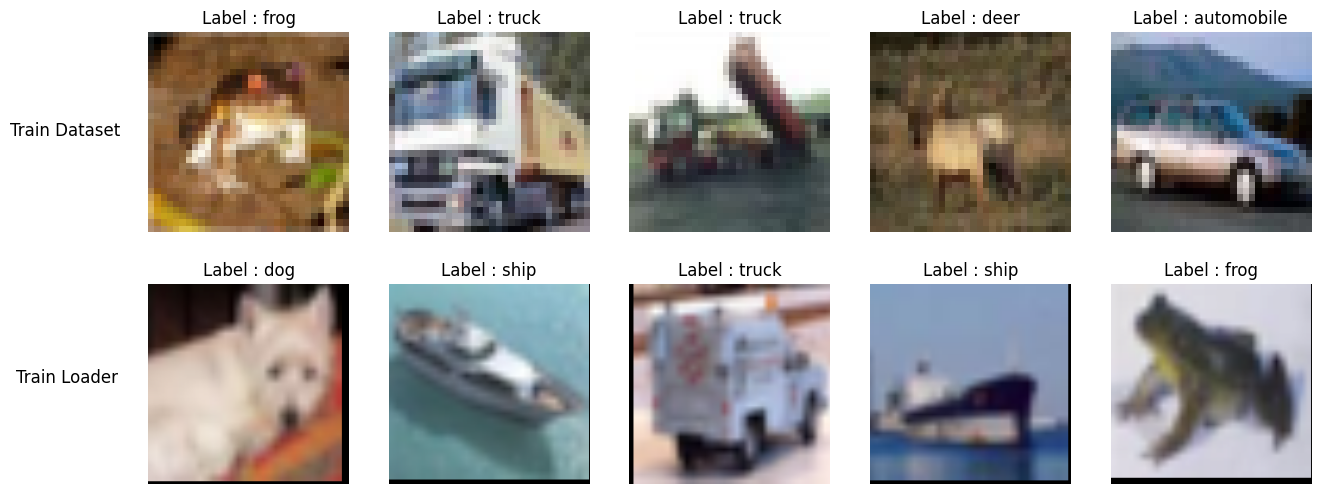

In [15]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
plt.axis("off")
raw_examples = train_loader.dataset.dataset.data[:5,:,:,:]
for i in range(5) :
  img_raw = raw_examples[i]
  ax[0,i].imshow(img_raw)
  ax[0,i].set_title(f"Label : {cifar10_labels[train_example_ind[i]]}")
  ax[0, i].axis("off")

  img = X_sample[i].permute(1, 2, 0).numpy()
  img = (std * (img) + mean) 
  ax[1,i].imshow(img)
  ax[1,i].set_title(f"Label : {cifar10_labels[x_sample_ind[i].item()]}")
  ax[1,i].axis("off")
  if i == 0:
        ax[0, i].text(-5, 16, "Train Dataset", fontsize=12, ha='right')
        ax[1, i].text(-35, 110, "Train Loader", ha='right', fontsize=12)

plt.show()


Pixel intensity distribution for the data from `train_dataset` **VS** 1000 images from `train_loader`.

In [16]:
train_loader_data = train_loader.dataset.dataset.data

In [17]:
red = train_loader_data[:,:,:,0].flatten()
green = train_loader_data[:,:,:,1].flatten()
blue = train_loader_data[:,:,:,2].flatten()

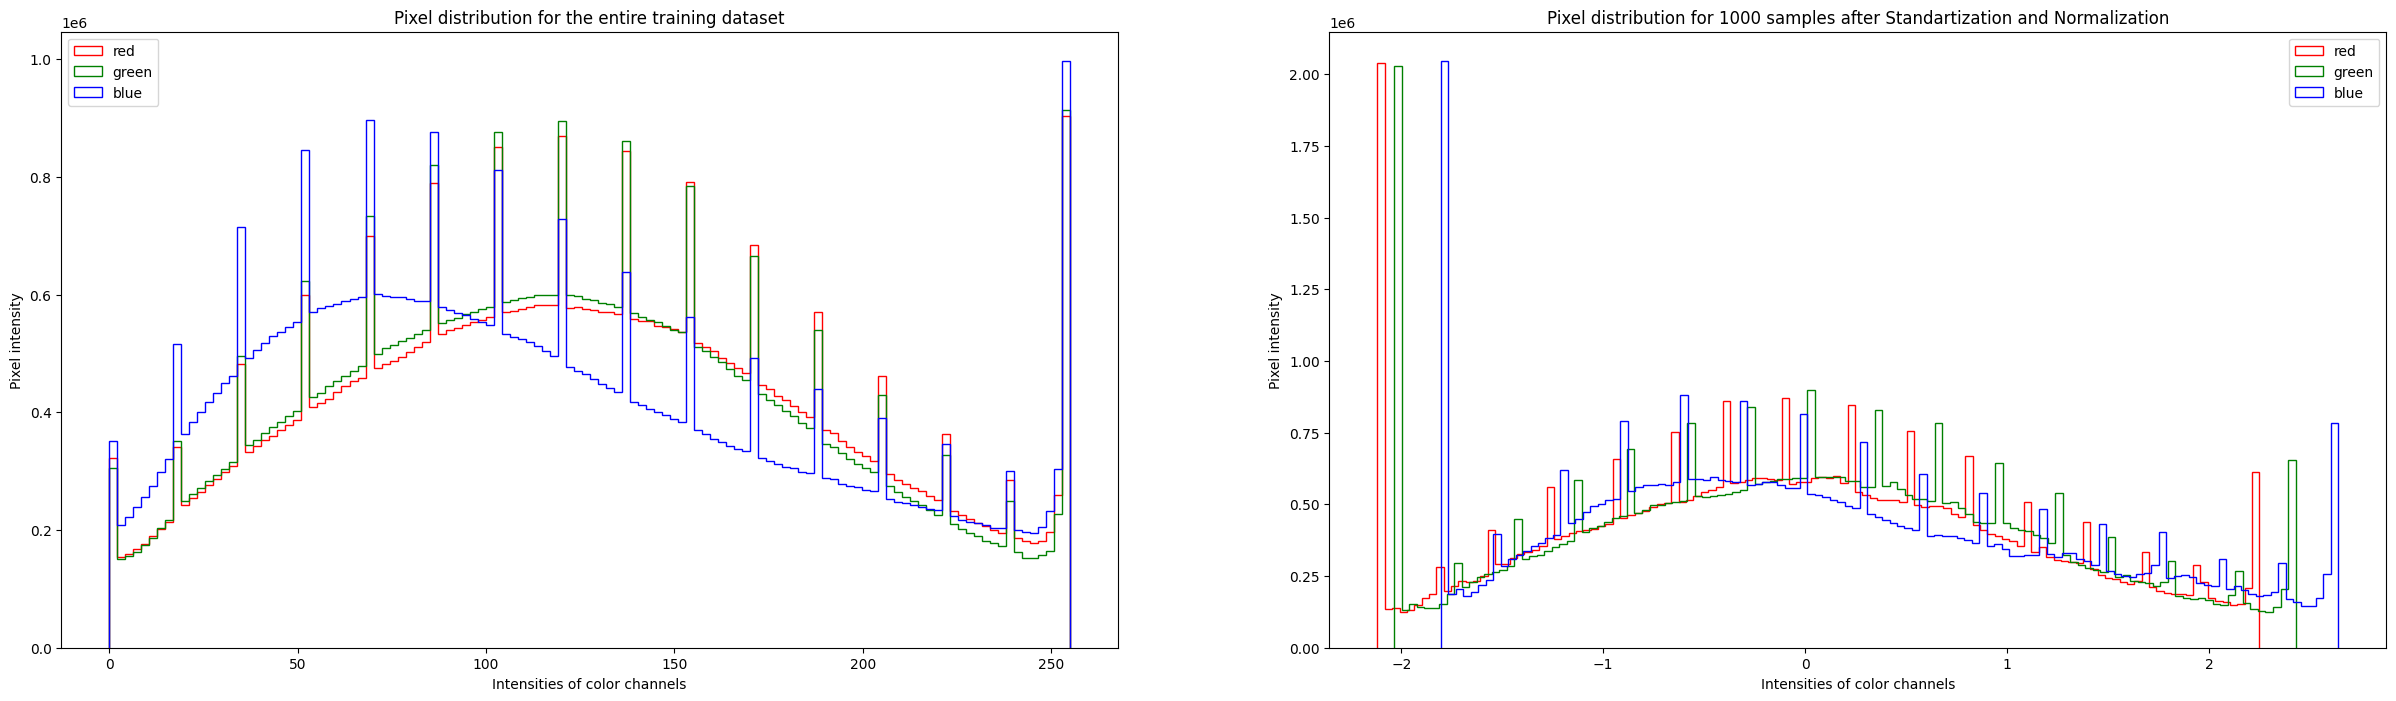

In [38]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
plt.hist(red, bins=120,histtype="step",color="red",label="red")
plt.hist(green, bins=120,histtype="step",color="green",label="green")
plt.hist(blue, bins=120,histtype="step",color="blue",label="blue")
plt.xlabel("Intensities of color channels")
plt.title("Pixel distribution for the entire training dataset")
plt.legend()
plt.ylabel("Pixel intensity")
plt.subplot(1,2,2)
plt.hist(red_image, bins=120,histtype="step",color="red",label="red")
plt.hist(green_image, bins=120,histtype="step",color="green",label="green")
plt.hist(blue_image, bins=120,histtype="step",color="blue",label="blue")
plt.legend()
plt.xlabel("Intensities of color channels")
plt.ylabel("Pixel intensity")
plt.title("Pixel distribution for 1000 samples after Standartization and Normalization")
plt.show()

  Distribution Characteristics: <br>
   >Left Graph:<br><br> 
   1.Blue Channel Dominance: The Blue channel shows significantly higher spikes in the lower intensity range (approx. 50–90), suggesting the dataset contains many images with dark blue tones or cool-colored shadows.<br><br>
   2.Red & Green Synchrony: The Red and Green channels are closely aligned, peaking in the mid-to-high intensity range (approx. 100–150), which is typical for images with natural lighting or warm tones.<br><br>
   3.Intensity Clipping: There are noticeable spikes at the far right (255), indicating pure white pixels where the sensor reached maximum saturation.
  <br>

  >Right Graph:<br><br>This graph shows the data after it has been mathematically transformed for model training.<br><br>
  1.Zero-Centering: All three color channels have been shifted so their mean is 0. This ensures that the model treats each color equally, regardless of whether one was originally brighter or darker.<br><br>
  2.Standardized Scaling: The x-axis is now measured in Standard Deviations (typically $-2$ to $+2$). This squashes the data into a uniform range, which helps the neural network learn faster.<br><br>
  3.Distribution Preservation: Although the scale has changed, the relative "shape" of the channels remains. The Blue channel still shows a distinct profile compared to the Red/Green pair, preserving the unique color characteristics of the images.

Creating tabular represenation of our data

In [45]:
X_train = pd.DataFrame(X_sample.reshape(1000,-1))
y_train = pd.DataFrame(y_sample, columns=["Labels"])
y_validation = pd.DataFrame(y_val, columns=["Labels"])
y_test_l = pd.DataFrame(y_test, columns=["Lables"])

In [13]:
X_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 150528 entries, 0 to 150527
dtypes: float32(150528)
memory usage: 574.2 MB


We have 1000 rows, and 150528 columns (this corresponds to the width and heigh of each image).

Statistical overview on the numerical data:

In [14]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.499581,-1.434986,-1.369998,-1.301413,-1.215173,-1.138111,-1.075537,-1.009145,-0.940012,-0.940081,...,-0.706423,-0.706335,-0.769359,-0.831285,-0.903564,-0.954109,-1.012479,-1.099747,-1.155294,-1.222362
std,1.205329,1.246132,1.285326,1.314456,1.358959,1.387140,1.406377,1.425241,1.435154,1.434169,...,1.312659,1.313431,1.290901,1.276069,1.256150,1.234670,1.216661,1.171497,1.144529,1.097130
min,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,...,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444
25%,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,...,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444
50%,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-1.818221,-1.835346,...,-1.307712,-1.316427,-1.560436,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444
75%,-1.621286,-1.218854,-0.953421,-0.662300,-0.413991,-0.229900,-0.092902,0.061221,0.211063,0.193938,...,0.182484,0.199913,0.095338,-0.009237,-0.113813,-0.166100,-0.305534,-0.619259,-0.771765,-1.015773
max,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,...,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000


>The table provides a statistical summary of the flattened pixel features (columns 0–150527). The constant count of 1000 confirms that there are no missing values across the training samples. Notably, the min (~ -2.12) and max (~ 2.25) values, validate that the data has been standardized. This confirms the pixel intensities have been rescaled from their original 0–255 integer range into a normalized distribution, which is necessary for the stability of the machine learning model.

In [15]:
X_train.isnull().sum().sum()

np.int64(0)

>There are no null values for each column in our DataFrame.

Here we have the label distribution for our training/validation/test datasets:

In [46]:
train_counts = y_train.value_counts()
val_counts = y_validation.value_counts()
test_counts = y_test_l.value_counts()

Creating a mapping between our labels and their quantity in the appropriate loader:

In [47]:
train_indexes = train_counts.index
train_dict = {cifar10_labels[x[0]]: y for x, y in zip(train_indexes, train_counts)}

val_indexes = val_counts.index
val_dict = {cifar10_labels[x[0]]: y for x, y in zip(val_indexes, val_counts)}

test_indexes = test_counts.index
test_dict = {cifar10_labels[x[0]]: y for x, y in zip(test_indexes, test_counts)}

C:\Users\yarik\AppData\Local\Temp\ipykernel_26832\979364037.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


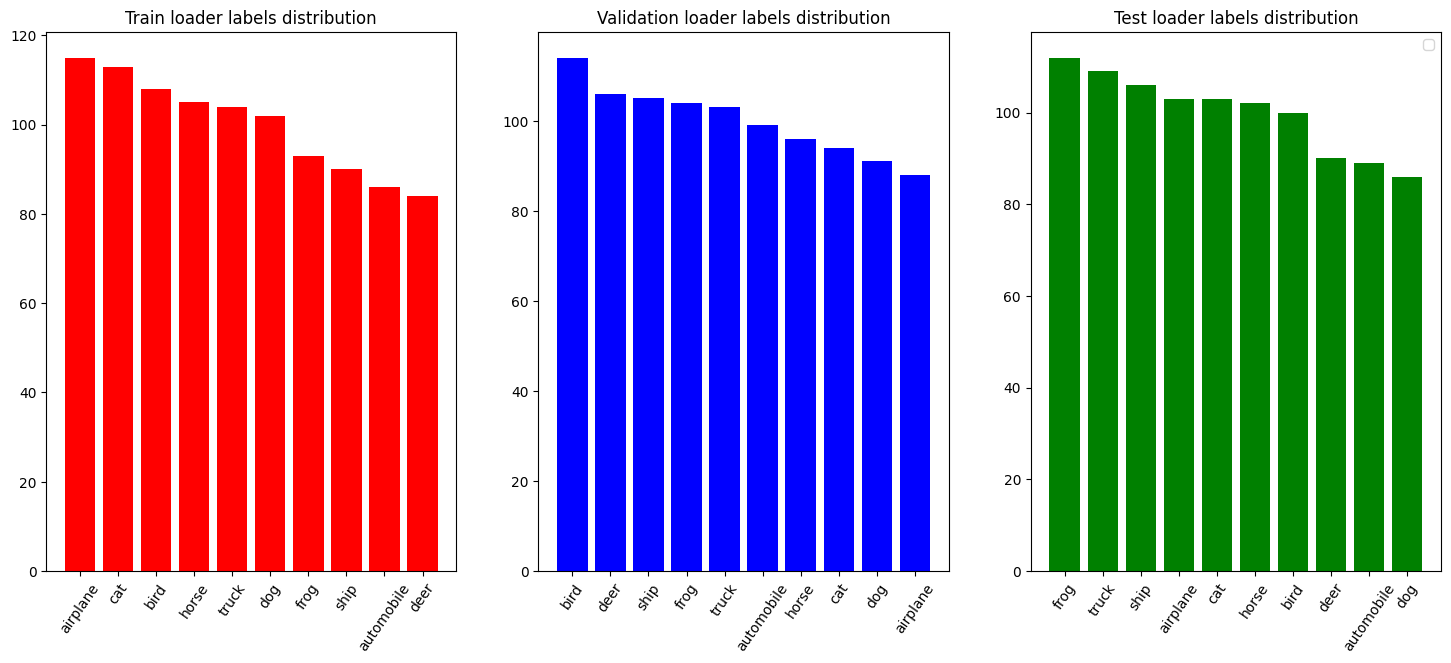

In [48]:

plt.figure(figsize=(18,7))
#plt.title("Classes and quantities of their instances in train/validation/test loaders")
plt.axis("off")
plt.subplot(1,3,1)
plt.bar(train_dict.keys(),train_dict.values(), color="red")
plt.title("Train loader labels distribution")
plt.xticks(rotation=55)
plt.subplot(1,3,2)
plt.bar(val_dict.keys(), val_dict.values(), color="blue")
plt.title("Validation loader labels distribution")
plt.xticks(rotation=55)
plt.subplot(1,3,3)
plt.bar(test_dict.keys(), test_dict.values(), color="green")
plt.title("Test loader labels distribution")
plt.xticks(rotation=55)
plt.legend()
plt.show()

>The target variables of each loader consist of 10 distinct classes (labels 0–9). The class frequencies are relatively balanced, ranging from a maximum to minimum samples. While for the train and validation loaders the "bird" and "deer" classes have the most number of instances, for the test loader they are only in the 7-th and 8-th positions respectively.

### Analytics of the raw data

Loading the training and test data for further visualization:

In [23]:
train_dataset = torchvision.datasets.CIFAR10("./data", train=True, download = True)
test_dataset = torchvision.datasets.CIFAR10("./data", train=False, download = True)

Files already downloaded and verified
Files already downloaded and verified


Converting data/labels for each dataset to a numpy object for faster computation purposes:

In [24]:
train_data = np.array(train_dataset.data, dtype= np.float32)
train_data_labels = np.array(train_dataset.targets)
test_data = np.array(test_dataset.data)
test_data_labels = np.array(test_dataset.targets)

In [25]:

print(f"The shape of the train data is {train_data.shape} and the shape of the training labels is {train_data_labels.shape}\n")
print(f"The shape of the test data is {test_data.shape} and the labels in the test set are {test_data_labels.shape}")

The shape of the train data is (50000, 32, 32, 3) and the shape of the training labels is (50000,)

The shape of the test data is (10000, 32, 32, 3) and the labels in the test set are (10000,)


Visual differences between the original image and the transformed image:

In [ ]:
raw_examples = train_data[:5,:,:,:]
proccesed_examples = X_sample[:5,:,:,:]

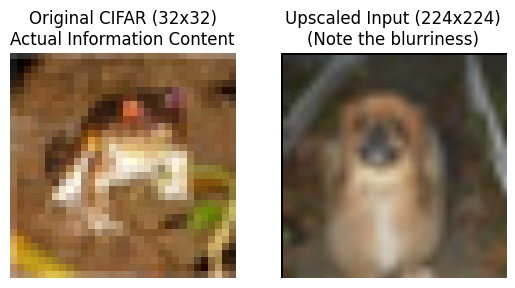

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(raw_examples[0])
ax[0].set_title(f"Original CIFAR (32x32)\nActual Information Content")

processed_img = proccesed_examples[0].permute(1, 2, 0).numpy()
processed_img = (std * (processed_img ) + mean)

ax[1].imshow(processed_img)
ax[1].set_title(f"Upscaled Input (224x224)\n(Note the blurriness)")

for a in ax:
    a.axis('off')
plt.show()

>By means of blurring we reduce the sharp lines and corners on the original picture, consequently our model will better learn the visual pattern.

## **Normalization of our data**

**Normalization** is a technique used to rescale the values of a dataset so that they end up within a specific, fixed range: usually between 0 and 1.

<br>

![image.png](https://media.licdn.com/dms/image/v2/C4E12AQFPqF6qfXYOvQ/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1624324925880?e=2147483647&v=beta&t=mOjcj9nj-WxLv26l9tmdqCTydSINEjX3YEENq_38bdM)



<br>
   
**The minimum value and the maximum value of the pixels is 0 and 255 respectively**


In [151]:
train_data = (train_data - 0) / (255 - 0)

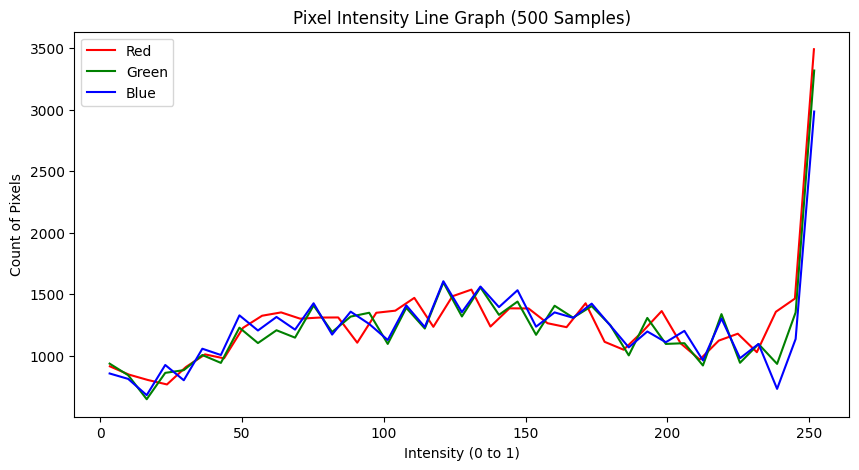

In [52]:
N = 500
sample_indices = train_data[:N, :]
sample_data = sample_indices.reshape(N, 32, 32, 3)
red_sample =  sample_data[0:500, 0, :, :].flatten()
green_sample = sample_data[0:500, 1, :, :].flatten()
blue_sample = sample_data[0:500, 2, :, :].flatten()

plt.figure(figsize=(10, 5))

# element="poly" turns the bars into a single connected line automatically
sb.histplot(red_sample, color="red", label="Red", element="poly", fill=False)
sb.histplot(green_sample, color="green", label="Green", element="poly", fill=False)
sb.histplot(blue_sample, color="blue", label="Blue", element="poly", fill=False)

plt.xlabel("Intensity (0 to 1)")
plt.title(f"Pixel Intensity Line Graph ({N} Samples)")
plt.ylabel("Count of Pixels")
plt.legend()
plt.show()


In [50]:
train_data = torch.from_numpy(train_data)

Creating a tabular representation of our data for analytical purposes ( .describe() and .info() methods)

In [51]:
train_data = train_data.reshape(train_data.shape[0], -1)
x = pd.DataFrame(train_data)
x.head(5)


,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59.0,62.0,63.0,43.0,46.0,45.0,50.0,48.0,43.0,68.0,...,104.0,216.0,184.0,140.0,151.0,118.0,84.0,123.0,92.0,72.0
1,154.0,177.0,187.0,126.0,137.0,136.0,105.0,104.0,95.0,102.0,...,136.0,143.0,133.0,139.0,143.0,134.0,142.0,143.0,133.0,144.0
2,255.0,255.0,255.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,...,79.0,78.0,85.0,83.0,79.0,85.0,83.0,80.0,86.0,84.0
3,28.0,25.0,10.0,37.0,34.0,19.0,38.0,35.0,20.0,42.0,...,38.0,54.0,47.0,28.0,63.0,56.0,37.0,72.0,65.0,46.0
4,170.0,180.0,198.0,168.0,178.0,196.0,177.0,185.0,203.0,183.0,...,78.0,75.0,79.0,82.0,71.0,75.0,78.0,73.0,77.0,80.0


In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: float32(3072)
memory usage: 585.9 MB


In [32]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.512591,0.533554,0.519819,0.510354,0.531147,0.517073,0.513923,0.534299,0.519927,0.515956,...,0.446580,0.497170,0.492930,0.446395,0.496333,0.492617,0.446691,0.496624,0.493531,0.448556
std,0.287891,0.285908,0.315486,0.284082,0.281972,0.312143,0.283296,0.281081,0.311510,0.282423,...,0.253872,0.250805,0.241533,0.254488,0.251683,0.242471,0.255733,0.254614,0.245685,0.259126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278431,0.301961,0.239216,0.278431,0.305882,0.239216,0.286275,0.309804,0.243137,0.286275,...,0.250980,0.309804,0.317647,0.250980,0.309804,0.317647,0.250980,0.305882,0.313726,0.247059
50%,0.501961,0.529412,0.498039,0.498039,0.529412,0.498039,0.505882,0.533333,0.501961,0.509804,...,0.415686,0.486275,0.482353,0.415686,0.486275,0.482353,0.415686,0.486275,0.482353,0.415686
75%,0.741176,0.764706,0.811765,0.737255,0.756863,0.807843,0.737255,0.760784,0.807843,0.737255,...,0.615686,0.674510,0.654902,0.615686,0.674510,0.654902,0.615686,0.674510,0.658824,0.619608
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
train_labels = pd.DataFrame(train_data_labels, columns=["Label"])

In [43]:
train_labels.head()

,Label
0,6
1,9
2,9
3,4
4,1


In [44]:
train_labels.value_counts()

,count
Label,
0,5000
1,5000
2,5000
3,5000
4,5000
5,5000
6,5000
7,5000
8,5000


At this step we notice that we have the same amount of instances for each class, but in reality when we take a look at the train_loader, we will see that the amount of labels for each class is not equal. The reason for this is following : after loading the train data, it is randomly splited into train and validation sets,this means, that some labels randomly moved to the training and validation sets.

# **Mean Intesities**

The following graphs represents the average intesity for each color channel.

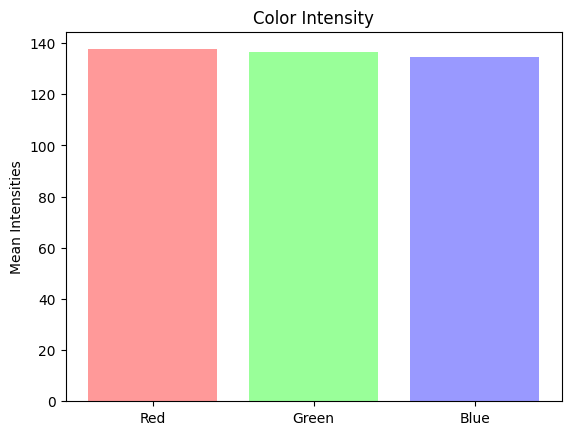

In [53]:
red_count = np.abs(red.mean())
blue_count = np.abs(blue.mean())
green_count = np.abs(green.mean())

plt.bar( x=["Red","Green", "Blue"],height=[red_count,green_count,blue_count], color=["#ff9999", "#99ff99", "#9999ff"])

plt.xticks()
plt.ylabel("Mean Intensities")
plt.title("Color Intensity")
plt.show()

Moreover, our dataset did not have any categorical columns, so we can avoid using OneHotEncoder.

# **Summary**

<br>
In this notebook, we conducted a comprehensive Exploratory Data Analysis (EDA) of the CIFAR-10 dataset to verify its suitability for Convolutional Neural Network training. Our investigation confirmed that the dataset is nearly perfectly balanced across its ten classes, which is essential for preventing model bias and ensuring effective generalization.<br>

Furthermore, we analyzed pixel intensity distributions and found them to be consistent across the Red, Green, and Blue channels, indicating that no single color dominates the input data. Finally, visual inspection of the preprocessing pipeline — specifically image upscaling and standardization — demonstrated that these techniques successfully stabilize the input data. This ensures the model is encouraged to learn robust, smooth patterns rather than overfitting to sharp, high-frequency noise.